In [1]:
# x,y => 선형 관계를 이룬다 -- 가정
# x,y 그리고 theta가 존재하고 이들은 선형 관계를 가진다
# 이때, softmax(logistic)까지 씌우면 multinomial 관계를 가질 수 있다
# logit => x를 p로 정의 가능
# 이때 theta*x = log p /(1-p)로 표현하고
# p를 베르누이를 사용하여 확률을 정리한다
# mu(x) = x에 대한 확률값
# 이 mu(x)를 logistic에 씌워서 정리

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X = np.linspace(np.pi, np.pi*2, 100)

In [28]:
Y = np.cos(X)

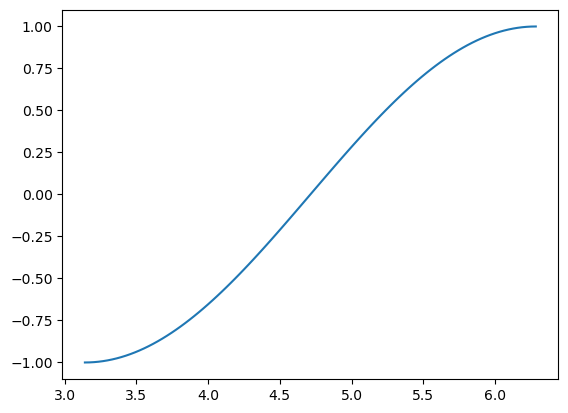

In [29]:
plt.plot(X, Y)

In [31]:
Y = np.zeros(len(X))
Y[np.cos(X) > 0] = 1

In [32]:
h = 1e-5
theta = np.random.rand(2)
X = np.c_[np.ones(len(X)), X]
epoch = 20000
se = lambda truey, predy: (truey - predy)**2

for _ in range(epoch):
    # for x,y in zip(X, Y):
    theta = theta + h*2*X.T.dot(Y-X.dot(theta))

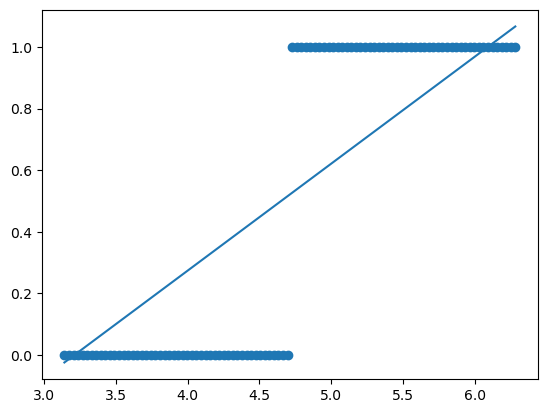

In [33]:
plt.scatter(X[:,1], Y)  # original data
plt.plot(X[:,1],X.dot(theta))

In [20]:
np.sum(se(Y, X.dot(theta))), np.mean(se(Y, X.dot(theta)))

(11.477767691675748, 0.11477767691675748)

In [34]:
trainingSet = [(1, 'Chinese Beijing Chinese', 'yes'), (2, 'Chinese Chinese Shanghai', 'yes'),(3, 'Chinese Macao', 'yes'),(4, 'Tokyo Japan Chinese', 'no')]
testSet = [(5, 'Chinese Chinese Chinese Tokyo Japan')]

In [37]:
# Vectorize(Boolean)
V = list(set('\n'.join(d[1] for d in trainingSet).lower().split()))

In [39]:
V   # morphs 나눈 것
X = np.zeros((4,len(V)))
for i, d in enumerate(trainingSet):
    for t in d[1].lower().split():
        if t in V:
            j = V.index(t)
            X[i,j] = 1
X   # X vectorized

array([[0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 1., 0.]])

In [40]:
Y = np.zeros((4,))
for i, d in enumerate(trainingSet):
    if d[2] == 'yes':
        Y[i] = 1
Y   # Y vecotrized

array([1., 1., 1., 0.])

In [44]:
newX = np.c_[np.ones(len(X)), X]
newX

array([[1., 0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0.]])

In [42]:
h = 1e-5
theta = np.random.rand(newX.shape[-1])
epoch = 20000
se = lambda truey, predy: (truey - predy)**2
history = list()

for i, _ in enumerate(range(epoch)):
    # for x,y in zip(X, Y):
    theta = theta + h*2*newX.T.dot(Y-newX.dot(theta))

    if i%1000 == 0:
        history.append(np.sum(se(Y, newX.dot(theta))))

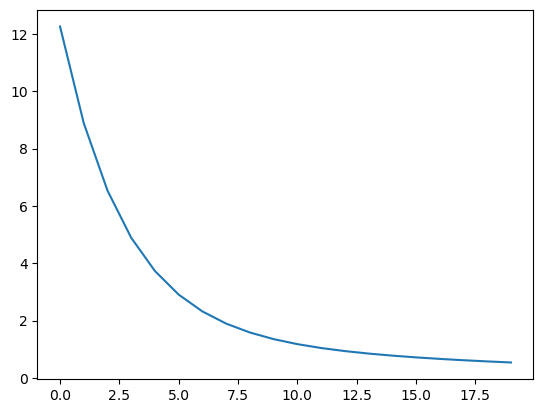

In [43]:
plt.plot(history)
# error가 떨어지고 있음을 알 수 있다

In [50]:
T = np.zeros((len(testSet), len(V)))

for i, d in enumerate(testSet):
    for t in d[1].lower().split():
        if t in V:
            j = V.index(t)
            T[i,j] = 1
T

array([[0., 0., 0., 0., 0., 0.]])

In [47]:
np.c_[np.ones((1,)), T].dot(theta) > .5

array([ True])

In [51]:
# vectorize => orthogonal
# boolean, count, TF-IDF, Weight...
# Linear => logistic vs Naive Bayes

In [103]:
X = np.zeros((4,len(V)))
for i, d in enumerate(trainingSet):
    for t in d[1].lower().split():
        if t in V:
            j = V.index(t)
            X[i,j] += 1
X   # X vectorized

Y = np.zeros((4,))
for i, d in enumerate(trainingSet):
    if d[2] == 'yes':
        Y[i] += 1
Y   # Y vecotrized

newX = np.c_[np.ones(len(X)), X]
newX

h = 1e-5
theta = np.random.rand(newX.shape[-1])
epoch = 20000
se = lambda truey, predy: (truey - predy)**2
history = list()

for i, _ in enumerate(range(epoch)):
    # for x,y in zip(X, Y):
    theta = theta + h*2*newX.T.dot(Y-newX.dot(theta))

    if i%1000 == 0:
        history.append(np.sum(se(Y, newX.dot(theta))))

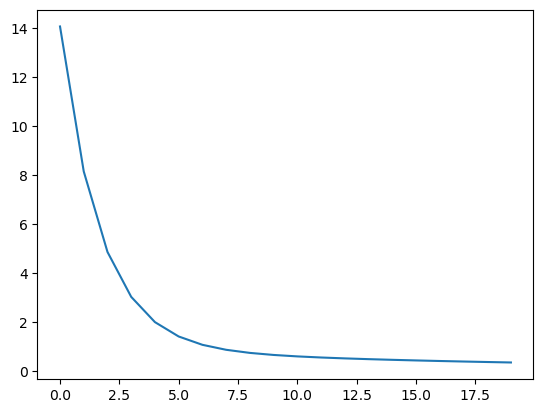

In [104]:
plt.plot(history)

In [130]:
# logistic
X = np.zeros((4,len(V)))
for i, d in enumerate(trainingSet):
    for t in d[1].lower().split():
        if t in V:
            j = V.index(t)
            X[i,j] = 1
X   # X vectorized

Y = np.zeros((4,))
for i, d in enumerate(trainingSet):
    if d[2] == 'yes':
        Y[i] = 1
Y   # Y vecotrized

newX = np.c_[np.ones(len(X)), X]
newX

h = 1e-5
theta = np.random.rand(newX.shape[-1])
epoch = 200000
se = lambda truey, predy: (truey - predy)**2
history = list()
ex1 = lambda x: np.exp(x)/(1+np.exp(x))

for i, _ in enumerate(range(epoch)):
    # for x,y in zip(X, Y):
    # theta = theta + h*2*newX.T.dot(Y-newX.dot(theta))
    d = Y-ex1(newX.dot(theta))
    theta = theta + h*(newX.T.dot(d)/np.linalg.norm(newX.T.dot(d)))

    if i%1000 == 0:
        history.append(np.sum(se(Y, newX.dot(theta))))

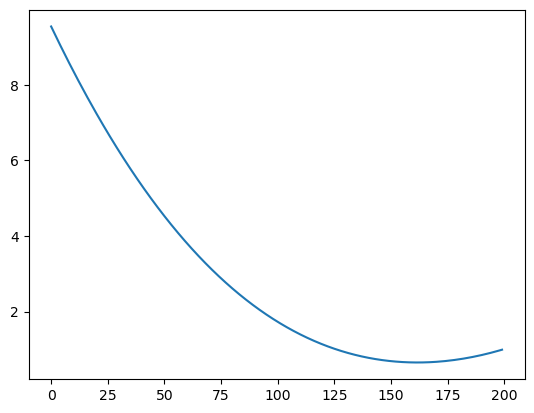

In [131]:
plt.plot(history)

In [134]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0],[1], [1], [1]]) # OR 왜냐하면 X의 index 내에서 맞는 애들만 1로 하니깐

In [158]:
def dataLoader(x, y, n=1):
    # shuffling
    # index를 mix해서 뽑아서 x,y element 뽑기 [i for i in range(len(x))]
    D = np.random.permutation(np.c_[x,y])

    # batch
    for i in range(len(x)//n):
        yield (D[i*n:i*n+n,:-1], D[i*n:i*n+n, -1:])

In [ ]:
[_ for _ in dataLoader(X,Y,2)]

In [159]:
W = np.random.rand(X.shape[-1], Y.shape[-1])

In [168]:
lr = 1e-5
epoch = 100000
W = np.random.rand(X.shape[-1], Y.shape[-1])
B = np.random.rand(Y.shape[-1])
# bias 는 y의 shape 만큼 필요

# 목적함수, 손실함수
J = lambda y, _y: (y-_y)**2

N=4

acc = list()
loss = list()

for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        yhat = x@W+B    # => (n,1)
        dloss = -2*(y-yhat)   # => vecotr에서 (yhat-y)
        # x.shape = (n,2)
        # w.shape = (2,1)
        dB = np.mean(dloss)*1   # n개의 평균
        # dB = np.sum(dloss) sum 방식일때
        dW = x.T @ dloss / N    # => (2,n) (n,1) = (2,1)
        # dW = x.T @ dloss sum 방식일때
        B = B - lr*dB
        W = W - lr*dW

    if epoch % 100 == 0:
        # acc.append(X@W+B >.5)
        loss.append(np.sum(J(Y, X@W+B)))

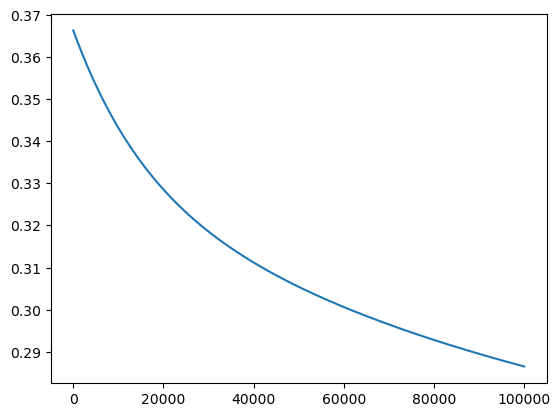

In [169]:
plt.plot(loss)

In [170]:
# w랑 b랑 합친 버전

W = np.random.rand(X.shape[-1]+1, Y.shape[-1])

lr = 1e-5
epoch = 100000
# bias 는 y의 shape 만큼 필요

# 목적함수, 손실함수
J = lambda y, _y: (y-_y)**2

N=4

loss = list()

for i in range(epoch):
    for x,y in dataLoader(X, Y, N):
        x = np.c_[np.ones(N), x]
        yhat = x@W   # => (n,1)
        dloss = -2*(y-yhat)   # => vecotr에서 (yhat-y)
        # x.shape = (n,2)
        # w.shape = (2,1)
        dW = x.T @ dloss    # => (2,n) (n,1) = (2,1)
        # dW = x.T @ dloss sum 방식일때
        W = W - lr*dW

    if epoch % 100 == 0:
        # acc.append(X@W+B >.5)
        loss.append(np.sum(J(Y, np.c_[np.ones(len(X)), X]@W)))

array([[False],
       [ True],
       [ True],
       [ True]])

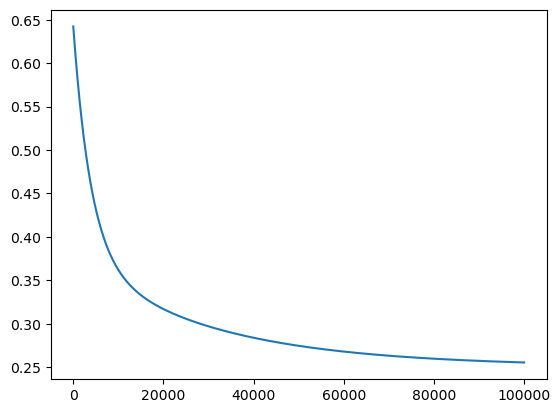

In [171]:
plt.plot(loss)
np.c_[np.ones(len(X)), X]@W >.5

In [ ]:
# logistic
